In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from typing import List, Set, Dict, Tuple, Optional
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loans = pd.read_csv("/content/drive/MyDrive/accepted_2007_to_2018Q4.csv.gz",low_memory=False)


In [ ]:
accepted=loans

##  Basic Checks

In [ ]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
accepted.shape

(2260701, 151)

In [ ]:
accepted.shape[0]

2260701

In [ ]:
accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
features_to_keep = [
    "loan_amnt",
    "funded_amnt",
    "term",
    "int_rate",
    "grade",
    "sub_grade",
    "emp_title",
    "emp_length",
    "home_ownership",
    "annual_inc",
    "issue_d",
    "title",
    "addr_state",
    "dti",
    "delinq_2yrs",
    "earliest_cr_line",
    "fico_range_low",
    "fico_range_high",
    "inq_last_6mths",
    "open_acc",
    "total_acc",
    "application_type",
    "pub_rec",
    "pub_rec_bankruptcies",

]

df=accepted[features_to_keep]

In [ ]:
df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             2260668 non-null  float64
 1   funded_amnt           2260668 non-null  float64
 2   term                  2260668 non-null  object 
 3   int_rate              2260668 non-null  float64
 4   grade                 2260668 non-null  object 
 5   sub_grade             2260668 non-null  object 
 6   emp_title             2093699 non-null  object 
 7   emp_length            2113761 non-null  object 
 8   home_ownership        2260668 non-null  object 
 9   annual_inc            2260664 non-null  float64
 10  issue_d               2260668 non-null  object 
 11  title                 2237343 non-null  object 
 12  addr_state            2260668 non-null  object 
 13  dti                   2258957 non-null  float64
 14  delinq_2yrs           2260639 non-

In [ ]:
df.rename(columns=lambda x: x.lower().strip().replace(" ", "_"), inplace=True)


<ipython-input-11-f85eee3dfa9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda x: x.lower().strip().replace(" ", "_"), inplace=True)


In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             2260668 non-null  float64
 1   funded_amnt           2260668 non-null  float64
 2   term                  2260668 non-null  object 
 3   int_rate              2260668 non-null  float64
 4   grade                 2260668 non-null  object 
 5   sub_grade             2260668 non-null  object 
 6   emp_title             2093699 non-null  object 
 7   emp_length            2113761 non-null  object 
 8   home_ownership        2260668 non-null  object 
 9   annual_inc            2260664 non-null  float64
 10  issue_d               2260668 non-null  object 
 11  title                 2237343 non-null  object 
 12  addr_state            2260668 non-null  object 
 13  dti                   2258957 non-null  float64
 14  delinq_2yrs           2260639 non-

In [ ]:
missing_values = df.isnull().sum()


print (missing_values)

loan_amnt                   33
funded_amnt                 33
term                        33
int_rate                    33
grade                       33
sub_grade                   33
emp_title               167002
emp_length              146940
home_ownership              33
annual_inc                  37
issue_d                     33
title                    23358
addr_state                  33
dti                       1744
delinq_2yrs                 62
earliest_cr_line            62
fico_range_low              33
fico_range_high             33
inq_last_6mths              63
open_acc                    62
total_acc                   62
application_type            33
pub_rec                     62
pub_rec_bankruptcies      1398
dtype: int64


There are many missing values, will try to impute with appropriate methods


In [ ]:
df["emp_title"] = df["emp_title"].fillna("not_provided")

<ipython-input-14-a50bea5135b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["emp_title"] = df["emp_title"].fillna("not_provided")


In [ ]:
df[df.duplicated()].count()

loan_amnt                0
funded_amnt              0
term                     0
int_rate                 0
grade                    0
sub_grade                0
emp_title               32
emp_length               0
home_ownership           0
annual_inc               0
issue_d                  0
title                    0
addr_state               0
dti                      0
delinq_2yrs              0
earliest_cr_line         0
fico_range_low           0
fico_range_high          0
inq_last_6mths           0
open_acc                 0
total_acc                0
application_type         0
pub_rec                  0
pub_rec_bankruptcies     0
dtype: int64

There are no duplicate values

In [ ]:
# checking descriptive statastics
df.describe().round(1)[['loan_amnt', 'funded_amnt', 'fico_range_low', 'fico_range_high', 'dti', 'annual_inc']]

,loan_amnt,funded_amnt,fico_range_low,fico_range_high,dti,annual_inc
count,2260668.0,2260668.0,2260668.0,2260668.0,2258957.0,2260664.0
mean,15046.9,15041.7,698.6,702.6,18.8,77992.4
std,9190.2,9188.4,33.0,33.0,14.2,112696.2
min,500.0,500.0,610.0,614.0,-1.0,0.0
25%,8000.0,8000.0,675.0,679.0,11.9,46000.0
50%,12900.0,12875.0,690.0,694.0,17.8,65000.0
75%,20000.0,20000.0,715.0,719.0,24.5,93000.0
max,40000.0,40000.0,845.0,850.0,999.0,110000000.0


The overall insights


The most common loan term is 36 months, accounting for the majority of loans.

The most frequent grade assigned to borrowers is "B," indicating a relatively good creditworthiness.

"Teacher" is the most common employment title among borrowers.

Many borrowers have an employment length of "10+ years."

The majority of borrowers have home ownership classified as "MORTGAGE."

The most common loan purpose is "Debt consolidation."

California (CA) has the highest number of borrowers among the states.

The earliest credit line opened by a borrower is in September 2004.

The majority of loans have an individual application type.

In [ ]:
# let's find out object features

df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,issue_d,title,addr_state,earliest_cr_line,application_type
count,2260668,2260668,2260668,2260701,2113761,2260668,2260668,2237343,2260668,2260639,2260668
unique,2,7,35,512695,11,6,139,63155,51,754,2
top,36 months,B,C1,not_provided,10+ years,MORTGAGE,Mar-2016,Debt consolidation,CA,Sep-2004,Individual
freq,1609754,663557,145903,167002,748005,1111450,61992,1153293,314533,15400,2139958


In [ ]:
#aggregation
grouped_by_application_type_dti = df.groupby('application_type')['dti'].mean()
print(grouped_by_application_type_dti)

application_type
Individual    18.093164
Joint App     31.970350
Name: dti, dtype: float64


In [ ]:
df.groupby('application_type')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
application_type,,,,,,,,
Individual,2139958.0,18.093164,8.425408,-1.0,11.78,17.60,24.04,49.96
Joint App,118999.0,31.970350,48.577435,-1.0,15.38,24.98,36.97,999.00


The analysis reveals that loans with 'Individual' application types have an average debt-to-income ratio (DTI) of approximately 18.09%. The majority of individual applicants have DTIs ranging from 11.78% to 24.04%. In contrast, loans with 'Joint App' application types have a higher average DTI of around 31.97%, with a wider range and higher variability compared to individual applications. This suggests that joint applications may involve higher levels of debt relative to income.

In [ ]:
# Groupby 'application_type' and calculate the 'annual_inc'

grouped_by_application_type_mean_inc = df.groupby('application_type')['annual_inc'].mean()
print(grouped_by_application_type_mean_inc)

grouped_by_application_type_desc_inc = df.groupby('application_type')['annual_inc'].describe()
print(grouped_by_application_type_desc_inc)

application_type
Individual    79001.083409
Joint App     60110.938289
Name: annual_inc, dtype: float64
                      count          mean            std     min      25%  \
application_type                                                            
Individual        2139954.0  79001.083409  115076.357666  1896.0  47400.0   
Joint App          120710.0  60110.938289   52456.466572     0.0  35000.0   

                      50%      75%          max  
application_type                                 
Individual        65300.0  95000.0  110000000.0  
Joint App         52000.0  75000.0    6240000.0  


Individuals applying individually have a higher average annual income of around  79,00 𝑤ℎ𝑖𝑙𝑒 𝑗𝑜𝑖𝑛𝑡 𝑎𝑝𝑝𝑙𝑖𝑐𝑎𝑛𝑡𝑠 ℎ𝑎𝑣𝑒 𝑎 𝑙𝑜𝑤𝑒𝑟 𝑎𝑣𝑒𝑟𝑎𝑔𝑒 𝑎𝑛𝑛𝑢𝑎𝑙 𝑖𝑛𝑐𝑜𝑚𝑒 𝑜𝑓 𝑎𝑝𝑝𝑟𝑜𝑥𝑖𝑚𝑎𝑡𝑒𝑙𝑦
 60,111.

Income distribution is wider for individuals, indicating higher variability in annual income compared to joint applicants.

The 25th percentile annual income is  47,400 𝑖𝑛𝑑𝑖𝑣𝑖𝑑𝑢𝑎𝑙𝑠 𝑎𝑛𝑑
 35,000 for joint applicants.

The maximum annual income observed is  110,000,000 𝑓𝑜𝑟 𝑖𝑛𝑑𝑖𝑣𝑖𝑑𝑢𝑎𝑙𝑠 𝑎𝑛𝑑
 6,240,000 for joint applicants.

These findings highlight the differences in average annual income and income distribution between individual and joint loan applicants.

In [ ]:
df['fico_score'] = (df['fico_range_low'] + df['fico_range_high']) / 2
df = df.drop(columns=['fico_range_low', 'fico_range_high'])

<ipython-input-21-53d7fe7267d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fico_score'] = (df['fico_range_low'] + df['fico_range_high']) / 2


In [ ]:
df.isnull().sum()

loan_amnt                   33
funded_amnt                 33
term                        33
int_rate                    33
grade                       33
sub_grade                   33
emp_title                    0
emp_length              146940
home_ownership              33
annual_inc                  37
issue_d                     33
title                    23358
addr_state                  33
dti                       1744
delinq_2yrs                 62
earliest_cr_line            62
inq_last_6mths              63
open_acc                    62
total_acc                   62
application_type            33
pub_rec                     62
pub_rec_bankruptcies      1398
fico_score                  33
dtype: int64

In [ ]:
df.head(2)

,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,total_acc,application_type,pub_rec,pub_rec_bankruptcies,fico_score
0,3600.0,3600.0,36 months,13.99,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,5.91,0.0,Aug-2003,1.0,7.0,13.0,Individual,0.0,0.0,677.0
1,24700.0,24700.0,36 months,11.99,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,16.06,1.0,Dec-1999,4.0,22.0,38.0,Individual,0.0,0.0,717.0


The new column was added representing the mean of fico score ranges as in rejected loan dataset.

In [ ]:
df['emp_title'].unique()

array(['leadman', 'Engineer', 'truck driver', ..., 'Sr. Photo Producer',
       'Exec Dir Internal Audit', 'Current Operations Officer'],
      dtype=object)

In [ ]:
categorical_columns = ['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership', 'issue_d', 'title', 'addr_state', 'application_type']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [ ]:
# Fill other numeric columns
numeric_columns = ['loan_amnt', 'funded_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'total_acc', 'pub_rec']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


In [ ]:
# Handle other special cases
df['pub_rec_bankruptcies'].fillna(0, inplace=True)


In [ ]:
df['fico_score'].fillna(df['fico_score'].mean(), inplace=True)


In [ ]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [ ]:
recent_date = df['earliest_cr_line'].max()
df['earliest_cr_line'].fillna(recent_date, inplace=True)

In [ ]:
# renaming emp title
df.rename(columns={'emp_title': 'occupation'}, inplace=True)
df["occupation"]= df["occupation"].astype(str).str.replace(" years", "").str.replace("+", "")


<ipython-input-31-57a577965aa7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["occupation"]= df["occupation"].astype(str).str.replace(" years", "").str.replace("+", "")


In [ ]:
# filling emp_length with median
df["emp_length"] = df["emp_length"].astype(str).str.replace(" years", "").str.replace("+", "")
df["emp_length"] = pd.to_numeric(df["emp_length"], errors="coerce")
median_emp_length = df["emp_length"].median()
df["emp_length"] = df["emp_length"].fillna(median_emp_length)


<ipython-input-32-5b52b1f3ce28>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["emp_length"] = df["emp_length"].astype(str).str.replace(" years", "").str.replace("+", "")


In [ ]:
# renaming emp title
df.rename(columns={'emp_title': 'occupation'}, inplace=True)
df["occupation"]= df["occupation"].astype(str).str.replace(" years", "").str.replace("+", "")


<ipython-input-33-57a577965aa7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["occupation"]= df["occupation"].astype(str).str.replace(" years", "").str.replace("+", "")


In [ ]:
# removing strings
df['term'] = df['term'].str.replace(' months', '')
df['term'] = pd.to_numeric(df['term'])


In [ ]:
# changing into datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   loan_amnt             float64       
 1   funded_amnt           float64       
 2   term                  int64         
 3   int_rate              float64       
 4   grade                 object        
 5   sub_grade             object        
 6   occupation            object        
 7   emp_length            float64       
 8   home_ownership        object        
 9   annual_inc            float64       
 10  issue_d               datetime64[ns]
 11  title                 object        
 12  addr_state            object        
 13  dti                   float64       
 14  delinq_2yrs           float64       
 15  earliest_cr_line      datetime64[ns]
 16  inq_last_6mths        float64       
 17  open_acc              float64       
 18  total_acc             float64       
 19  

In [ ]:
df.isnull().sum()

loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
grade                   0
sub_grade               0
occupation              0
emp_length              0
home_ownership          0
annual_inc              0
issue_d                 0
title                   0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
total_acc               0
application_type        0
pub_rec                 0
pub_rec_bankruptcies    0
fico_score              0
dtype: int64

In [ ]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,occupation,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,total_acc,application_type,pub_rec,pub_rec_bankruptcies,fico_score
0,3600.0,3600.0,36,13.99,C,C4,leadman,10.0,MORTGAGE,55000.0,...,5.91,0.0,2003-08-01,1.0,7.0,13.0,Individual,0.0,0.0,677.0
1,24700.0,24700.0,36,11.99,C,C1,Engineer,10.0,MORTGAGE,65000.0,...,16.06,1.0,1999-12-01,4.0,22.0,38.0,Individual,0.0,0.0,717.0
2,20000.0,20000.0,60,10.78,B,B4,truck driver,10.0,MORTGAGE,63000.0,...,10.78,0.0,2000-08-01,0.0,6.0,18.0,Joint App,0.0,0.0,697.0
3,35000.0,35000.0,60,14.85,C,C5,Information Systems Officer,10.0,MORTGAGE,110000.0,...,17.06,0.0,2008-09-01,0.0,13.0,17.0,Individual,0.0,0.0,787.0
4,10400.0,10400.0,60,22.45,F,F1,Contract Specialist,3.0,MORTGAGE,104433.0,...,25.37,1.0,1998-06-01,3.0,12.0,35.0,Individual,0.0,0.0,697.0


In [ ]:
# Checking outliers
numeric_columns = df.select_dtypes(include='number').columns
print(numeric_columns)


Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'total_acc', 'pub_rec', 'pub_rec_bankruptcies', 'fico_score'],
      dtype='object')


In [ ]:
def plot_numeric_outliers(data, numeric_columns, nrows, ncols, figsize):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

    for i, column in enumerate(numeric_columns):
        row = i // ncols
        col = i % ncols
        ax = axes[row, col]
        sns.boxplot(x=data[column], color="#1a5899", ax=ax)
        ax.set_xlabel(column, labelpad=12, fontdict={"fontsize": 16})

    # Remove empty subplots
    for i in range(len(numeric_columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])


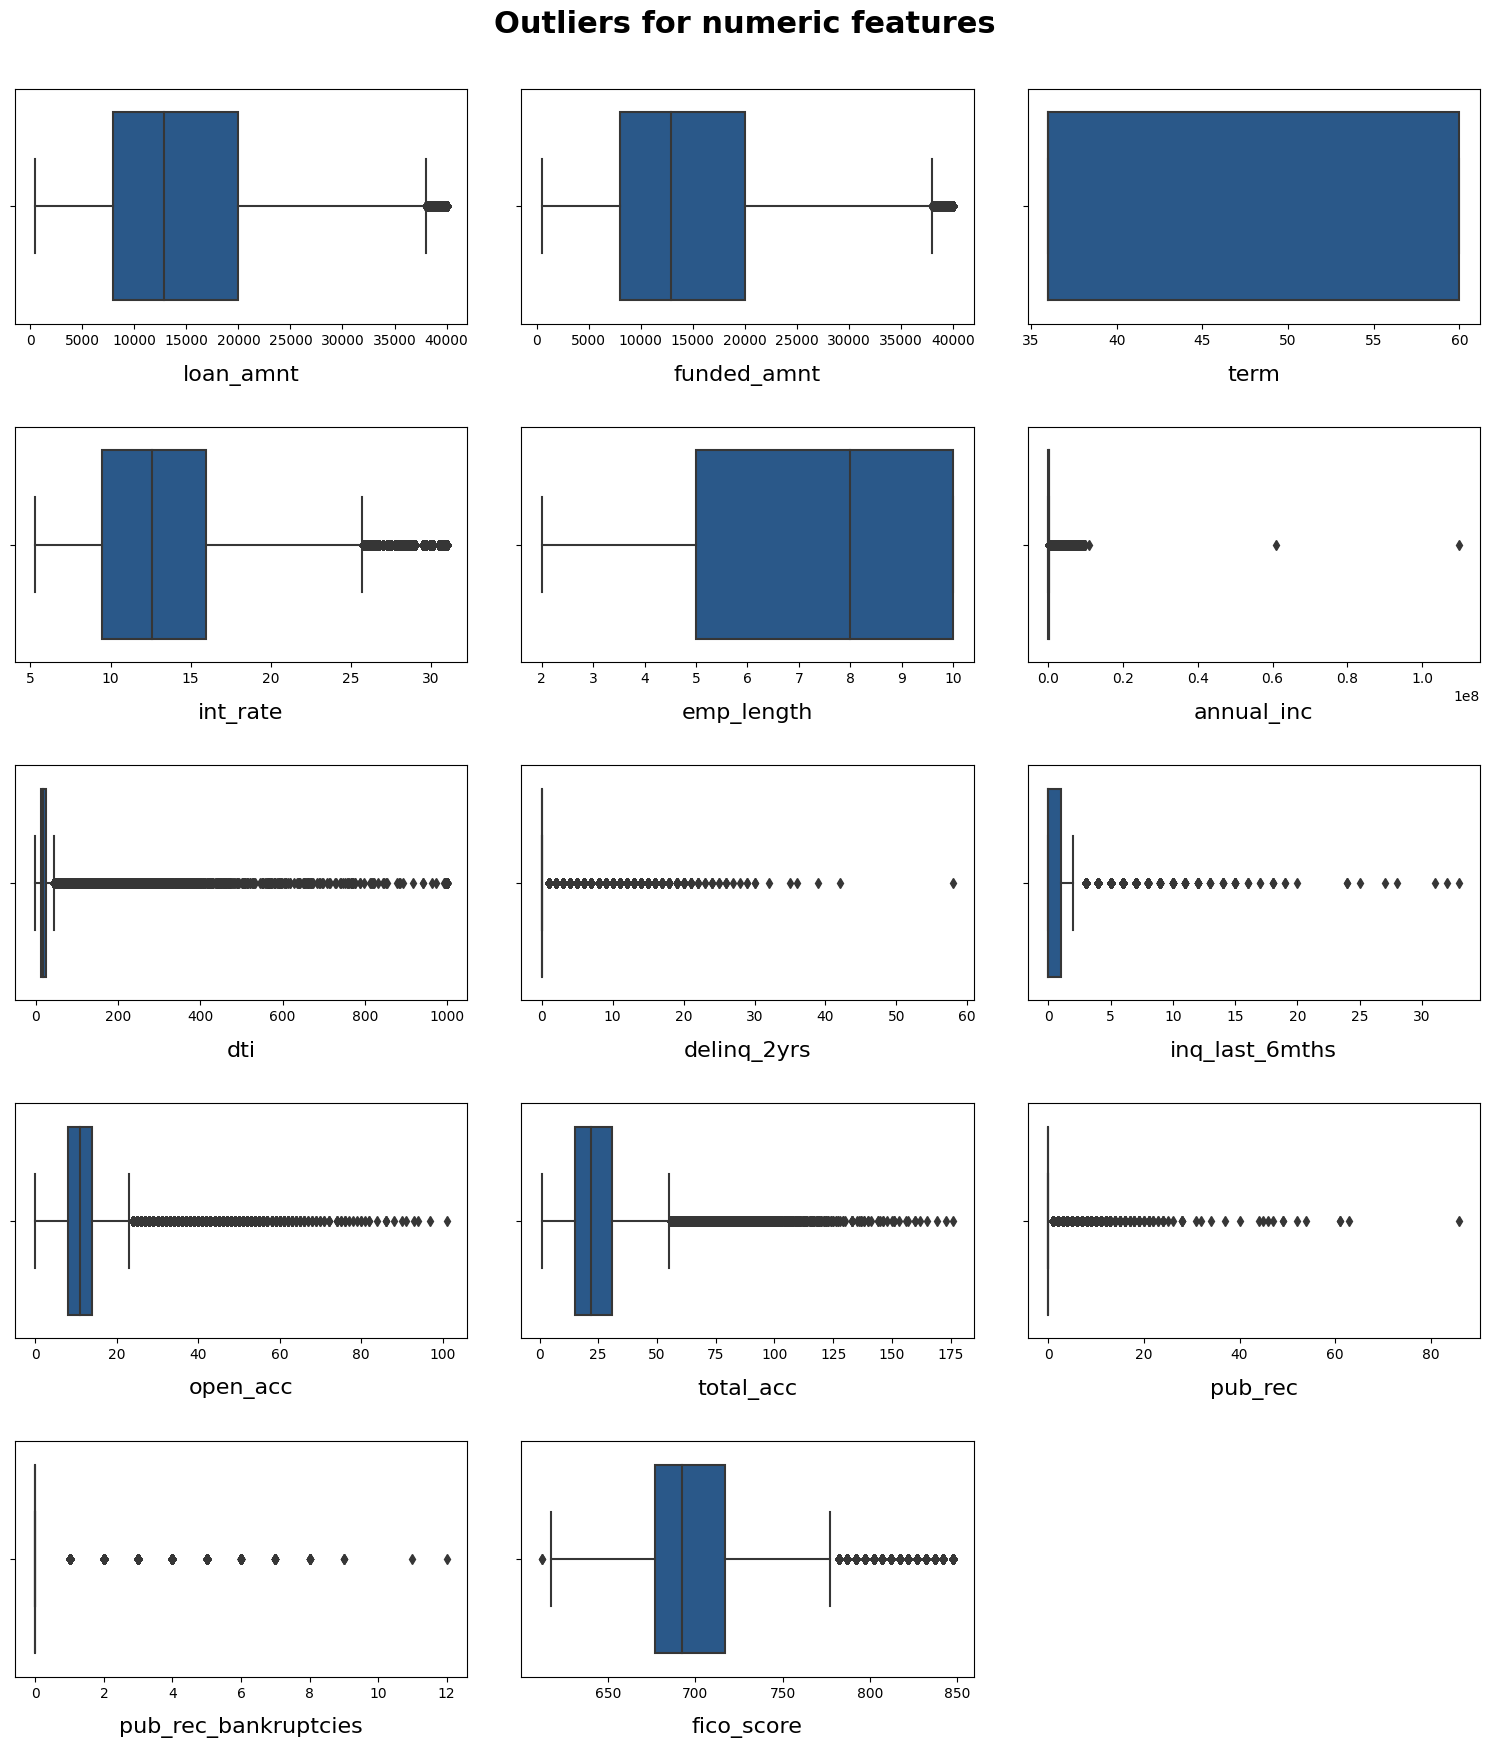

In [ ]:
plot_numeric_outliers(df, numeric_columns, nrows=6, ncols=3, figsize=(15, 20))
plt.suptitle("Outliers for numeric features", fontsize=22, fontweight="semibold", y=1.01)
plt.tight_layout(h_pad=3, w_pad=3)
plt.show()

There are many outliers , I will check it if necessary will remove else will keep it as it is may be important for reaseach

In [ ]:
# Calculate z-scores
z_scores = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()

threshold = 3

# indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

for column in numeric_columns:
    column_outliers = outlier_indices[0][np.where(outlier_indices[1] == df.columns.get_loc(column))]
    print(f"Outliers in '{column}': {column_outliers}")

Outliers in 'loan_amnt': []
Outliers in 'funded_amnt': []
Outliers in 'term': []
Outliers in 'int_rate': [    809     878    2668 ... 2260134 2260346 2260412]
Outliers in 'emp_length': [     49      96     118 ... 2260624 2260660 2260696]
Outliers in 'annual_inc': [     33      60      93 ... 2260574 2260579 2260631]
Outliers in 'dti': [     17      26      53 ... 2260070 2260093 2260153]
Outliers in 'delinq_2yrs': []
Outliers in 'inq_last_6mths': []
Outliers in 'open_acc': []
Outliers in 'total_acc': []
Outliers in 'pub_rec': []
Outliers in 'pub_rec_bankruptcies': []
Outliers in 'fico_score': []


The presence of outliers in certain columns indicates the need for further investigation to determine their impact on the analysis or modeling tasks at hand. Outliers can provide valuable insights into potential anomalies, data quality issues, or unique patterns in the dataset.

However outliers are not removed as they are an important part of the analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   loan_amnt             float64       
 1   funded_amnt           float64       
 2   term                  int64         
 3   int_rate              float64       
 4   grade                 object        
 5   sub_grade             object        
 6   occupation            object        
 7   emp_length            float64       
 8   home_ownership        object        
 9   annual_inc            float64       
 10  issue_d               datetime64[ns]
 11  title                 object        
 12  addr_state            object        
 13  dti                   float64       
 14  delinq_2yrs           float64       
 15  earliest_cr_line      datetime64[ns]
 16  inq_last_6mths        float64       
 17  open_acc              float64       
 18  total_acc             float64       
 19  

In [ ]:
accept_selected =df[
    [
        "loan_amnt",
        "issue_d",
        "title",
        "fico_score",
        "dti",
        "addr_state",
        "emp_length",
    ]
]

In [ ]:
accept_selected = accept_selected.rename(
    columns={
        "loan_amnt": "amount_requested",
        "issue_d": "date",
        "title": "loan_purpose",
        "addr_state": "state",

    }
)
accept_selected["loan_progress"] = "accepted"

In [ ]:
accept_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   amount_requested  float64       
 1   date              datetime64[ns]
 2   loan_purpose      object        
 3   fico_score        float64       
 4   dti               float64       
 5   state             object        
 6   emp_length        float64       
 7   loan_progress     object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 138.0+ MB


In [ ]:
accept_selected.isna().sum()

amount_requested    0
date                0
loan_purpose        0
fico_score          0
dti                 0
state               0
emp_length          0
loan_progress       0
dtype: int64

In [ ]:
accept_selected.to_csv('accept_v11.csv', index=False)

I created a new dataframe accepted for checking loans got accepted and only kept some features which are needed.

**Grade**

In [ ]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   loan_amnt             float64       
 1   funded_amnt           float64       
 2   term                  int64         
 3   int_rate              float64       
 4   grade                 object        
 5   sub_grade             object        
 6   occupation            object        
 7   emp_length            float64       
 8   home_ownership        object        
 9   annual_inc            float64       
 10  issue_d               datetime64[ns]
 11  title                 object        
 12  addr_state            object        
 13  dti                   float64       
 14  delinq_2yrs           float64       
 15  earliest_cr_line      datetime64[ns]
 16  inq_last_6mths        float64       
 17  open_acc              float64       
 18  total_acc             float64       
 19  

In [ ]:
loans_by_grade_term = (
    df.groupby(["grade", "term"])
    .size()
    .groupby(level=0)
    .apply(lambda x: round(100 * x / x.sum(), 2))
    .reset_index(name="percentage")
)



<ipython-input-53-1df194706f49>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: round(100 * x / x.sum(), 2))


In [ ]:
loans_by_grade_term

,grade,term,percentage
0,A,36,94.49
1,A,60,5.51
2,B,36,80.61
3,B,60,19.39
4,C,36,64.59
5,C,60,35.41
6,D,36,56.78
7,D,60,43.22
8,E,36,37.45
9,E,60,62.55


In [ ]:

value_counts = df["grade"].value_counts(normalize=True) * 100


grades_percentage = value_counts.to_frame().reset_index()

grades_percentage.columns = ["Grade", "Percentage"]

In [ ]:
grades_percentage

,Grade,Percentage
0,B,29.353285
1,C,28.754488
2,A,19.154545
3,D,14.350593
4,E,5.999865
5,F,1.848984
6,G,0.538240


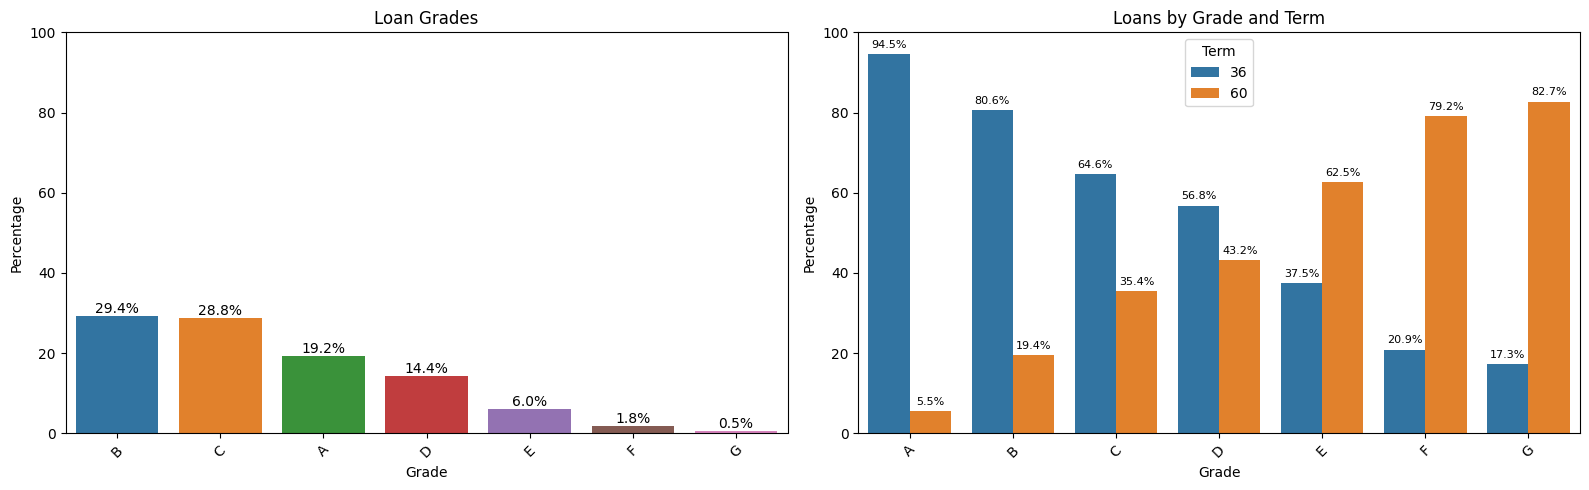

In [ ]:
# Plot 1: Bar plot for loan grades
plt.figure(figsize=(16, 5))
ax1 = plt.subplot(121)
sns.barplot(x="Grade", y="Percentage", data=grades_percentage)
plt.xlabel("Grade")
plt.ylabel("Percentage")
plt.title("Loan Grades")
plt.ylim([0, 100])
plt.bar_label(ax1.containers[0], fmt='%.1f%%')
plt.xticks(rotation=45)

# Plot 2: Stacked bar plot for loans by grade and term
ax2 = plt.subplot(122)
sns.barplot(x="grade", y="percentage", data=loans_by_grade_term, hue="term")
plt.xlabel("Grade")
plt.ylabel("Percentage")
plt.title("Loans by Grade and Term")
plt.ylim([0, 100])
plt.bar_label(ax2.containers[0], fmt='%.1f%%', label_type='edge', fontsize=8, padding=3)
plt.bar_label(ax2.containers[1], fmt='%.1f%%', label_type='edge', fontsize=8, padding=3)

plt.legend(title="Term")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Grades Distribution: The majority of loans fall into grades B and C, accounting for approximately 58% of the total loans. Grades A and D follow with around 19% and 14% respectively. Grades E, F, and G have a smaller share, ranging from 0.5% to 6%.

Loan Term Distribution: When considering loan terms, for each grade, loans are divided between 36-month and 60-month terms. The distribution varies across grades. Generally, a higher percentage of loans in lower grades (A, B, C) have a 36-month term, while a higher percentage of loans in higher grades (E, F, G) have a 60-month term.

Term Distribution by Grade: Among loans with a 36-month term, grades A and B account for the largest percentages, with over 94% and 80% respectively. For loans with a 60-month term, grades F and G have the highest percentages, with approximately 79% and 83% respectively.

**Subgrade**

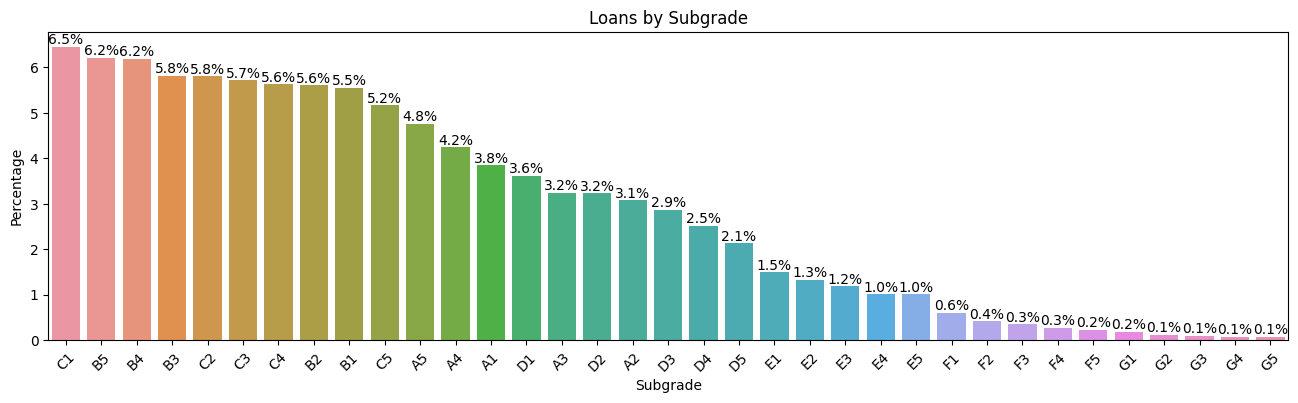

In [ ]:
# Calculate value counts and normalize
subgrade_counts = df["sub_grade"].value_counts(normalize=True) * 100

subgrade_percentage = subgrade_counts.to_frame().reset_index()

# Rename columns
subgrade_percentage.columns = ["Subgrade", "Percentage"]

plt.figure(figsize=(16, 4))
ax = sns.barplot(x="Subgrade", y="Percentage", data=subgrade_percentage)
plt.xlabel("Subgrade")
plt.ylabel("Percentage")
plt.title("Loans by Subgrade")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()


The most common subgrades are C1, B5, and B4, each with approximately 6% of the total.

The distribution of subgrades is relatively balanced, with percentages ranging from around 6% to less than 0.1%.

The subgrades C1, B5, and B4 have the highest percentages, indicating a relatively higher occurrence compared to other subgrades.
The subgrades G5, G4, G3, and

**Interest**

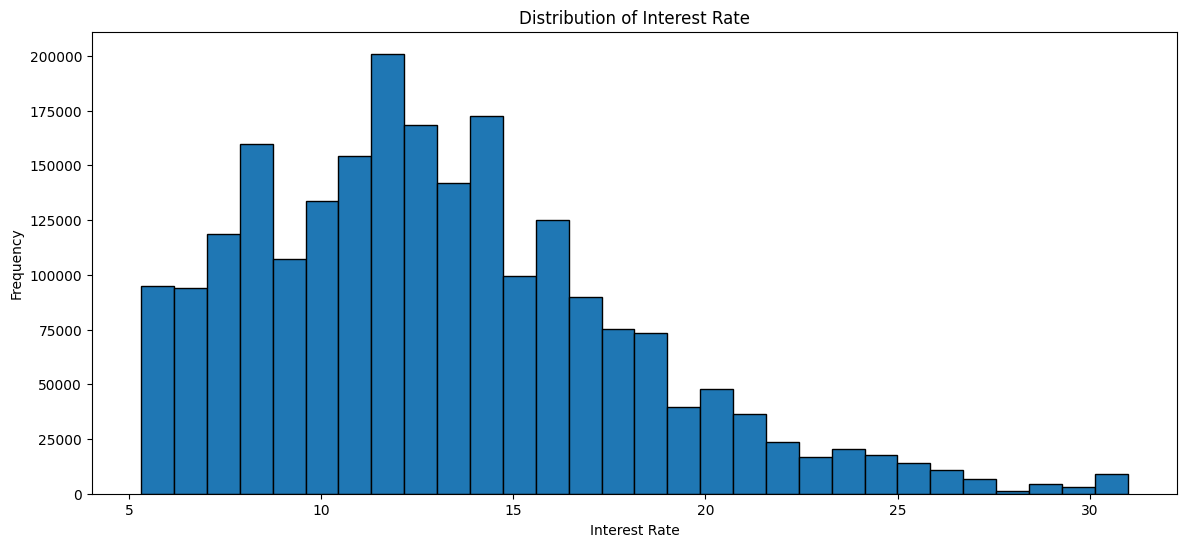

In [ ]:
plt.figure(figsize=(14, 6))
plt.hist(df["int_rate"], bins=30, edgecolor='k')
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Interest Rate")
plt.show()



The histogram of the "int_rate" shows that the majority of interest rates fall within the range of 10% to 15%. There is a peak around the 10% to 15% range, indicating that many loans have interest rates within this range.

As the interest rate increases beyond 15%, the frequency gradually decreases, suggesting that fewer loans have higher interest rates.

 The histogram also reveals that there are no interest rates below 5% or above 30% in the dataset. Overall, the distribution of interest rates is positively skewed, with a concentration of loans having relatively lower interest rates.